In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

# Data Preprocessing

In [ ]:
#importer les données
import pickle
def load_dataset(dataset_path):
  with open(dataset_path, 'rb') as reader:
      data = pickle.load(reader)


  return (data)

from google.colab import drive
drive.mount('/content/drive')

path11 = "/content/drive/My Drive/ANR-DISCRET/keywordmergedmai10min.pkl"
data20 = load_dataset(path11)

path12 = "/content/drive/My Drive/ANR-DISCRET/keywordmergedjuin.pkl"
data21 = load_dataset(path12)

Mounted at /content/drive


In [ ]:
from google.colab import files
data = files.upload()
import pandas as pd
import io
df = pd.read_csv(io.StringIO(data['df_juin_anomalies.csv'].decode('utf-8')),delimiter=";")

Saving df_juin_anomalies.csv to df_juin_anomalies.csv


In [ ]:
df

,time,Nombre de tweets,anomaly
0,2021-06-14 12:00:00+00:00,335,0
1,2021-06-14 12:10:00+00:00,1763,0
2,2021-06-14 12:20:00+00:00,1739,0
3,2021-06-14 12:40:00+00:00,1888,0
4,2021-06-14 12:50:00+00:00,1900,0
...,...,...,...
1257,2021-06-23 11:30:00+00:00,1796,0
1258,2021-06-23 11:40:00+00:00,1981,0
1259,2021-06-23 11:50:00+00:00,1844,0
1260,2021-06-23 12:00:00+00:00,1913,0


In [ ]:
#changer la colonne created_at comme index 
data20= data20.set_index('created_at')
data20

,attaque,incendie,accident,secours,agression,paris,nice,lyon,terroriste,crue,innondation,orage,freqtotale
created_at,,,,,,,,,,,,,
2021-04-30 19:00:00+00:00,22,9,22,7,11,209,16,46,7,2,0.0,2,744
2021-04-30 19:10:00+00:00,64,7,32,17,20,434,28,51,13,2,0.0,3,1426
2021-04-30 19:20:00+00:00,74,6,51,20,48,426,26,55,15,6,0.0,1,1415
2021-04-30 19:30:00+00:00,59,6,27,22,35,389,43,47,16,6,1.0,3,1403
2021-04-30 19:40:00+00:00,44,8,49,20,29,359,54,62,16,4,1.0,6,1408
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24 23:20:00+00:00,54,2,21,24,34,281,35,117,23,1,2.0,8,1132
2021-05-24 23:30:00+00:00,42,8,16,12,33,248,41,84,16,6,2.0,3,1098
2021-05-24 23:40:00+00:00,19,1,8,3,8,84,7,35,2,4,2.0,4,346


In [ ]:
data21= data21.set_index('created_at')
data21

,orage,innondation,crue,paris,freq_totale
created_at,,,,,
2021-06-14 12:00:00+00:00,3,0.0,1,59,192
2021-06-14 12:10:00+00:00,3,0.0,4,330,1068
2021-06-14 12:20:00+00:00,3,3.0,1,335,1080
2021-06-14 12:40:00+00:00,5,1.0,1,410,1202
2021-06-14 12:50:00+00:00,1,1.0,1,339,1138
...,...,...,...,...,...
2021-06-23 11:30:00+00:00,11,2.0,2,331,1065
2021-06-23 11:40:00+00:00,12,4.0,4,318,1106
2021-06-23 11:50:00+00:00,15,1.0,4,324,1088


# train test

In [ ]:
#diviser les données en train/test
data1 = data20['freqtotale']
data1 = pd.DataFrame(data1)

data1innondation = data20['innondation']
data1innondation = pd.DataFrame(data1innondation)
data1crue = data20['crue']
data1crue = pd.DataFrame(data1crue)
data1orage = data20['orage']
data1orage = pd.DataFrame(data1orage)


In [ ]:


test1freqtotale = data21
test1freqtotale = test1freqtotale[['freq_totale']]


test1innondation = data21
test1innondation = test1innondation[['innondation']]

test1crue = data21

test1crue = test1crue[['crue']]


test1orage = data21

test1orage = test1orage[['orage']]


# preprocessing

In [ ]:
#mise à l'échelle des données
from sklearn.preprocessing import RobustScaler



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(data1[['freqtotale']])
scaler = scaler.fit(data1innondation[['innondation']])
scaler = scaler.fit(data1crue[['crue']])
scaler = scaler.fit(data1orage[['orage']])


data1['freqtotale'] = scaler.transform(data1[['freqtotale']])
test1freqtotale['freq_totale'] = scaler.transform(test1freqtotale[['freq_totale']])


data1innondation['innondation'] = scaler.transform(data1innondation[['innondation']])
test1innondation['innondation'] = scaler.transform(test1innondation[['innondation']])

data1orage['orage'] = scaler.transform(data1orage[['orage']])
test1orage['orage'] = scaler.transform(test1orage[['orage']])


data1crue['crue'] = scaler.transform(data1crue[['crue']])
test1crue['crue'] = scaler.transform(test1crue[['crue']])




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
#redimentionner les vecteurs train/test en des vecteurs de dimensions 3
TIME_STEPS = 5

# reshape to [samples, time_steps, n_features]

X_train1, y_train1 = create_dataset(data1, data1.freqtotale, TIME_STEPS)
X_test1, y_test1 = create_dataset(test1freqtotale, test1freqtotale.freq_totale, TIME_STEPS)


X_train1innondation, y_train1innondation = create_dataset(data1innondation, data1innondation.innondation, TIME_STEPS)
X_test1innondation, y_test1innondation = create_dataset(test1innondation, test1innondation.innondation, TIME_STEPS)


X_train1crue, y_train1crue = create_dataset(data1crue, data1crue.crue, TIME_STEPS)
X_test1crue, y_test1crue = create_dataset(test1crue, test1crue.crue, TIME_STEPS)

X_train1orage, y_train1orage = create_dataset(data1orage, data1orage.orage, TIME_STEPS)
X_test1orage, y_test1orage = create_dataset(test1orage, test1orage.orage, TIME_STEPS)

print(X_train1.shape, y_train1.shape)

(2401, 5, 1) (2401,)


# Modeling

In [ ]:
#definir le modele
model = keras.Sequential()
model.add(keras.layers.LSTM(
    units=64, 
    input_shape=(X_train1.shape[1], X_train1.shape[2])
))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.RepeatVector(n=X_train1.shape[1]))
model.add(keras.layers.LSTM(units=64, return_sequences=True))
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(units=X_train1.shape[2])))

model.compile(loss='mae', optimizer='adam')

## Training + prediction frequence globale

In [ ]:
#entrainer le modele
history = model.fit(
    X_train1, y_train1, 
    epochs=40, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/40
68/68 [==============================] - 0s 5ms/step - loss: 8.1603 - val_loss: 7.8798
Epoch 2/40
68/68 [==============================] - 0s 5ms/step - loss: 8.0424 - val_loss: 7.8103
Epoch 3/40
68/68 [==============================] - 0s 5ms/step - loss: 8.0111 - val_loss: 7.5255
Epoch 4/40
68/68 [==============================] - 0s 5ms/step - loss: 7.9401 - val_loss: 7.5376
Epoch 5/40
68/68 [==============================] - 0s 5ms/step - loss: 7.9937 - val_loss: 7.4176
Epoch 6/40
68/68 [==============================] - 0s 5ms/step - loss: 7.9453 - val_loss: 7.3958
Epoch 7/40
68/68 [==============================] - 0s 5ms/step - loss: 7.9063 - val_loss: 7.6054
Epoch 8/40
68/68 [==============================] - 0s 5ms/step - loss: 7.9069 - val_loss: 7.4112
Epoch 9/40
68/68 [==============================] - 0s 5ms/step - loss: 7.9785 - val_loss: 7.2599
Epoch 10/40
68/68 [==============================] - 0s 5ms/step - loss: 7.9744 - val_loss: 7.5492
Epoch 11/40
68/68 [

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



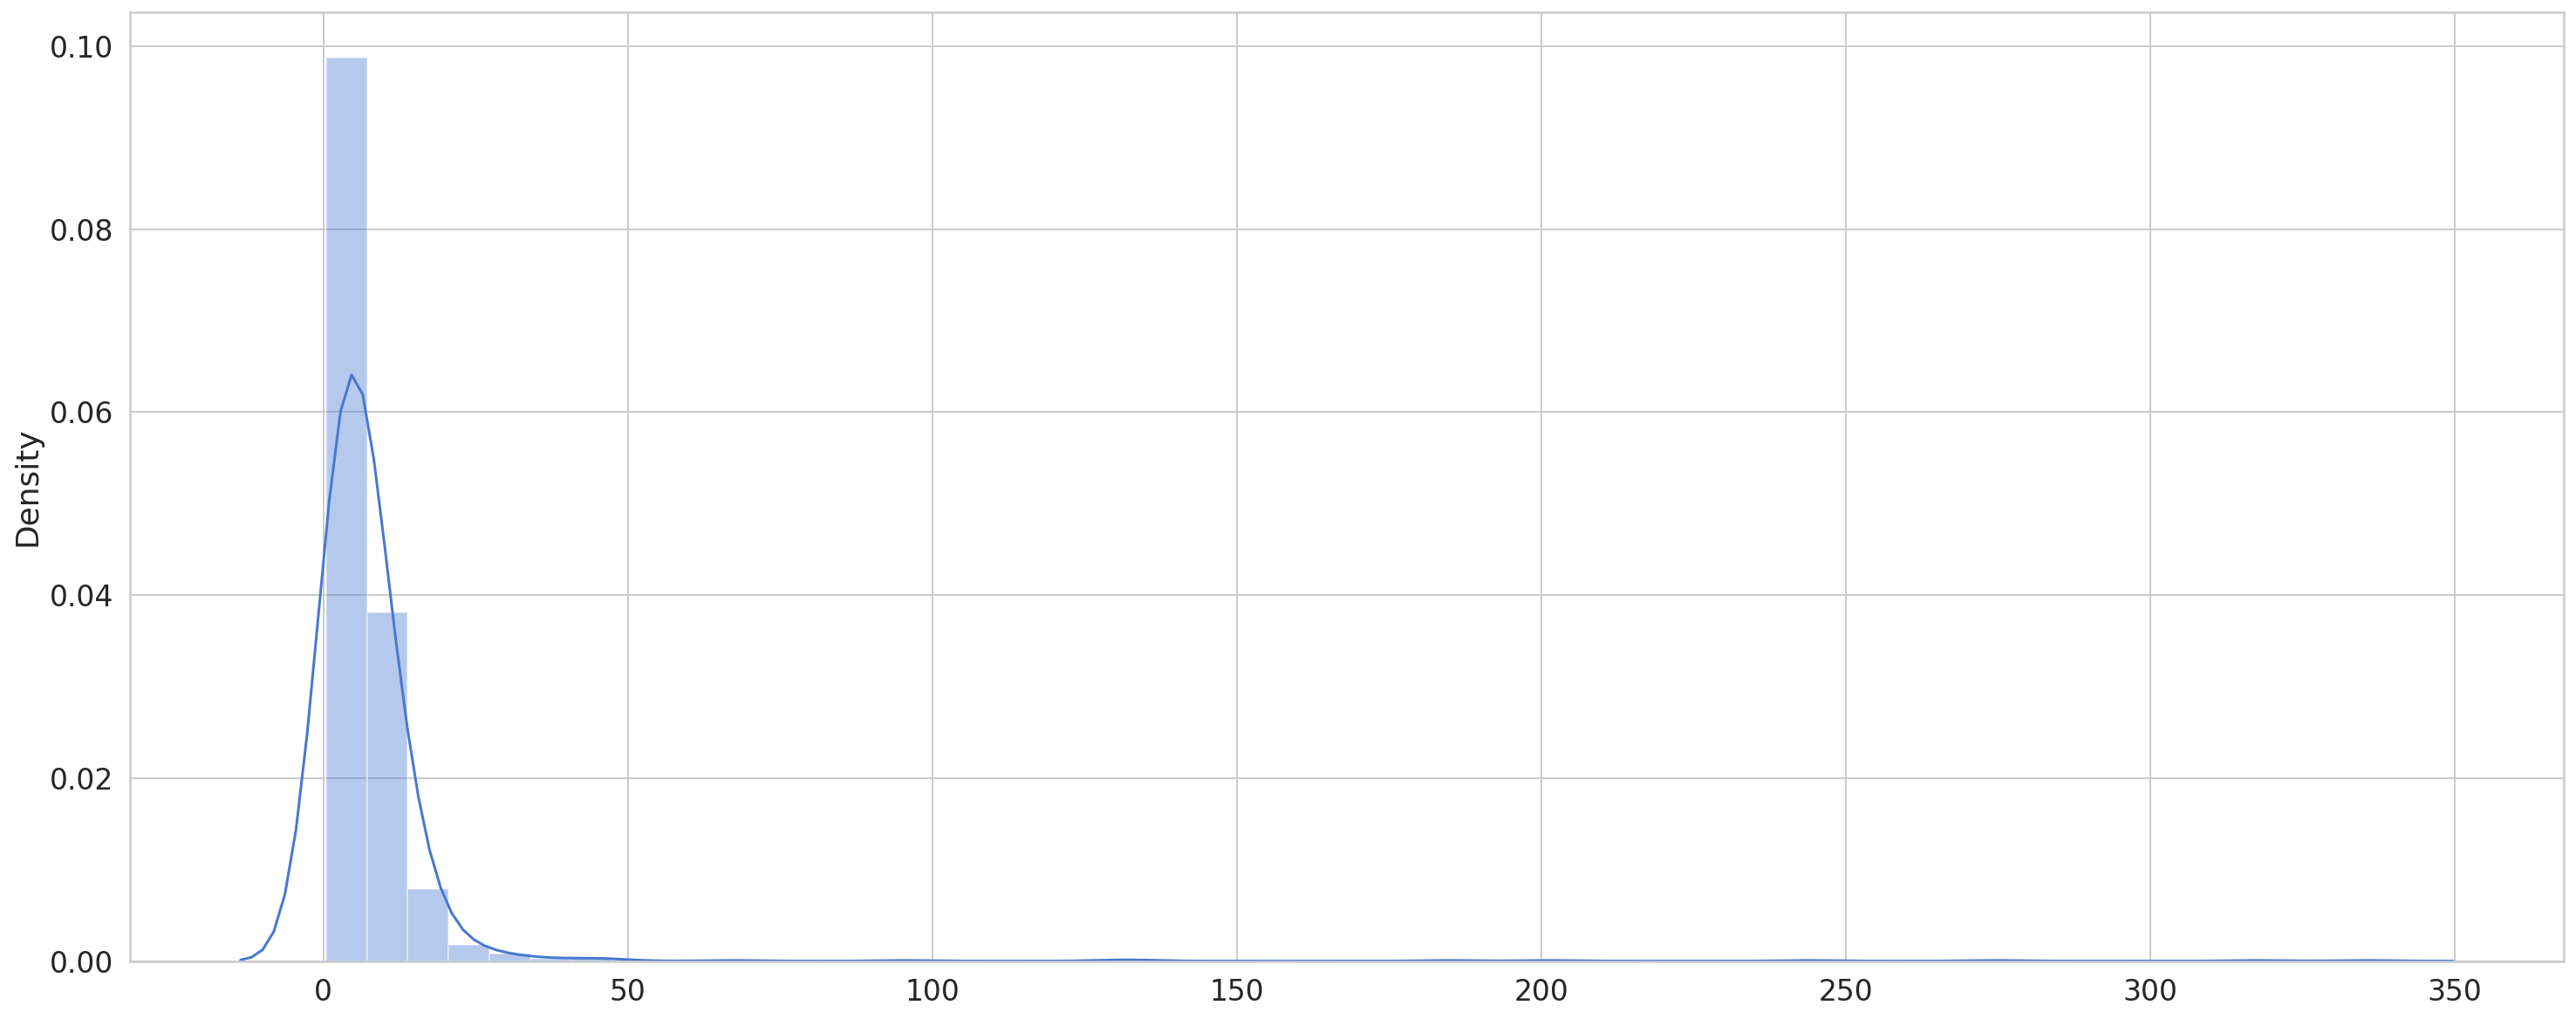

In [ ]:
#la prédiction 
X_test_predfreq1 = model.predict(X_test1)


test_mae_lossfreq1 = np.mean(np.abs(X_test_predfreq1 - X_test1), axis=1)


plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1, bins=50, kde=True);

In [ ]:
predictfreq1 = X_test_predfreq1[:,0]
test_predfreq1 = pd.DataFrame(index=test1freqtotale[TIME_STEPS:].index)
test_predfreq1['pred'] = scaler.inverse_transform(predictfreq1)
test_predfreq1


,pred
created_at,
2021-06-14 13:00:00+00:00,1083.949829
2021-06-14 13:10:00+00:00,1266.800171
2021-06-14 13:20:00+00:00,1340.374390
2021-06-14 13:30:00+00:00,1335.057617
2021-06-14 13:40:00+00:00,1441.453979
...,...
2021-06-23 11:30:00+00:00,1135.644775
2021-06-23 11:40:00+00:00,1122.221191
2021-06-23 11:50:00+00:00,1148.100708


In [ ]:

#plot données réelles vs données prédites
import plotly.express as px


fig = px.line(test1freqtotale, x=test1freqtotale[TIME_STEPS:].index, y=scaler.inverse_transform(test1freqtotale[TIME_STEPS:].freq_totale),title="data vs pred")

fig.add_scatter(x=test_predfreq1.index, y=test_predfreq1[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')
#fig.add_scatter(x=test_predfreq2.index, y=test_predfreq2[TIME_STEPS:].pred, mode='lines',name="pred2",marker_color='rgba(255, 15, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
threshold = []
tpr=[]
fpr=[]
tab_auc = pd.DataFrame({"threshold": threshold,
                                "tpr":tpr,
                                "fpr":fpr })
tab_auc

,threshold,tpr,fpr


In [ ]:
THRESHOLD = 7

test_score_dffreq1 = pd.DataFrame(index=test1freqtotale[TIME_STEPS:].index)
test_score_dffreq1['loss'] = test_mae_lossfreq1
test_score_dffreq1['threshold'] = THRESHOLD
test_score_dffreq1['anomaly'] = test_score_dffreq1.loss > test_score_dffreq1.threshold
test_score_dffreq1['nbtweet'] = test1freqtotale[TIME_STEPS:].freq_totale
test_score_dffreq1




,loss,threshold,anomaly,nbtweet
created_at,,,,
2021-06-14 13:00:00+00:00,14.220708,7,True,81.783761
2021-06-14 13:10:00+00:00,7.697686,7,True,88.824362
2021-06-14 13:20:00+00:00,9.383121,7,True,87.080360
2021-06-14 13:30:00+00:00,5.983409,7,False,96.640074
2021-06-14 13:40:00+00:00,8.923562,7,True,89.405696
...,...,...,...,...
2021-06-23 11:30:00+00:00,7.321503,7,True,68.219302
2021-06-23 11:40:00+00:00,5.133132,7,False,70.867601
2021-06-23 11:50:00+00:00,5.920325,7,False,69.704933


In [ ]:

# plot des écarts avec le seuil
import plotly.express as px


fig = px.bar(test_score_dffreq1, x=test_score_dffreq1.index, y="loss")
fig.add_scatter(x=test_score_dffreq1.index, y=test_score_dffreq1['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1.index, y=test_score_dffreq1['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



(array([168., 306., 206., 152., 122.,  80.,  79.,  40.,  30.,  21.,  10.,
          5.,   5.,   5.,   3.,   2.,   3.,   1.,   1.,   2.,   1.,   0.,
          1.,   0.,   0.,   0.,   3.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0., 

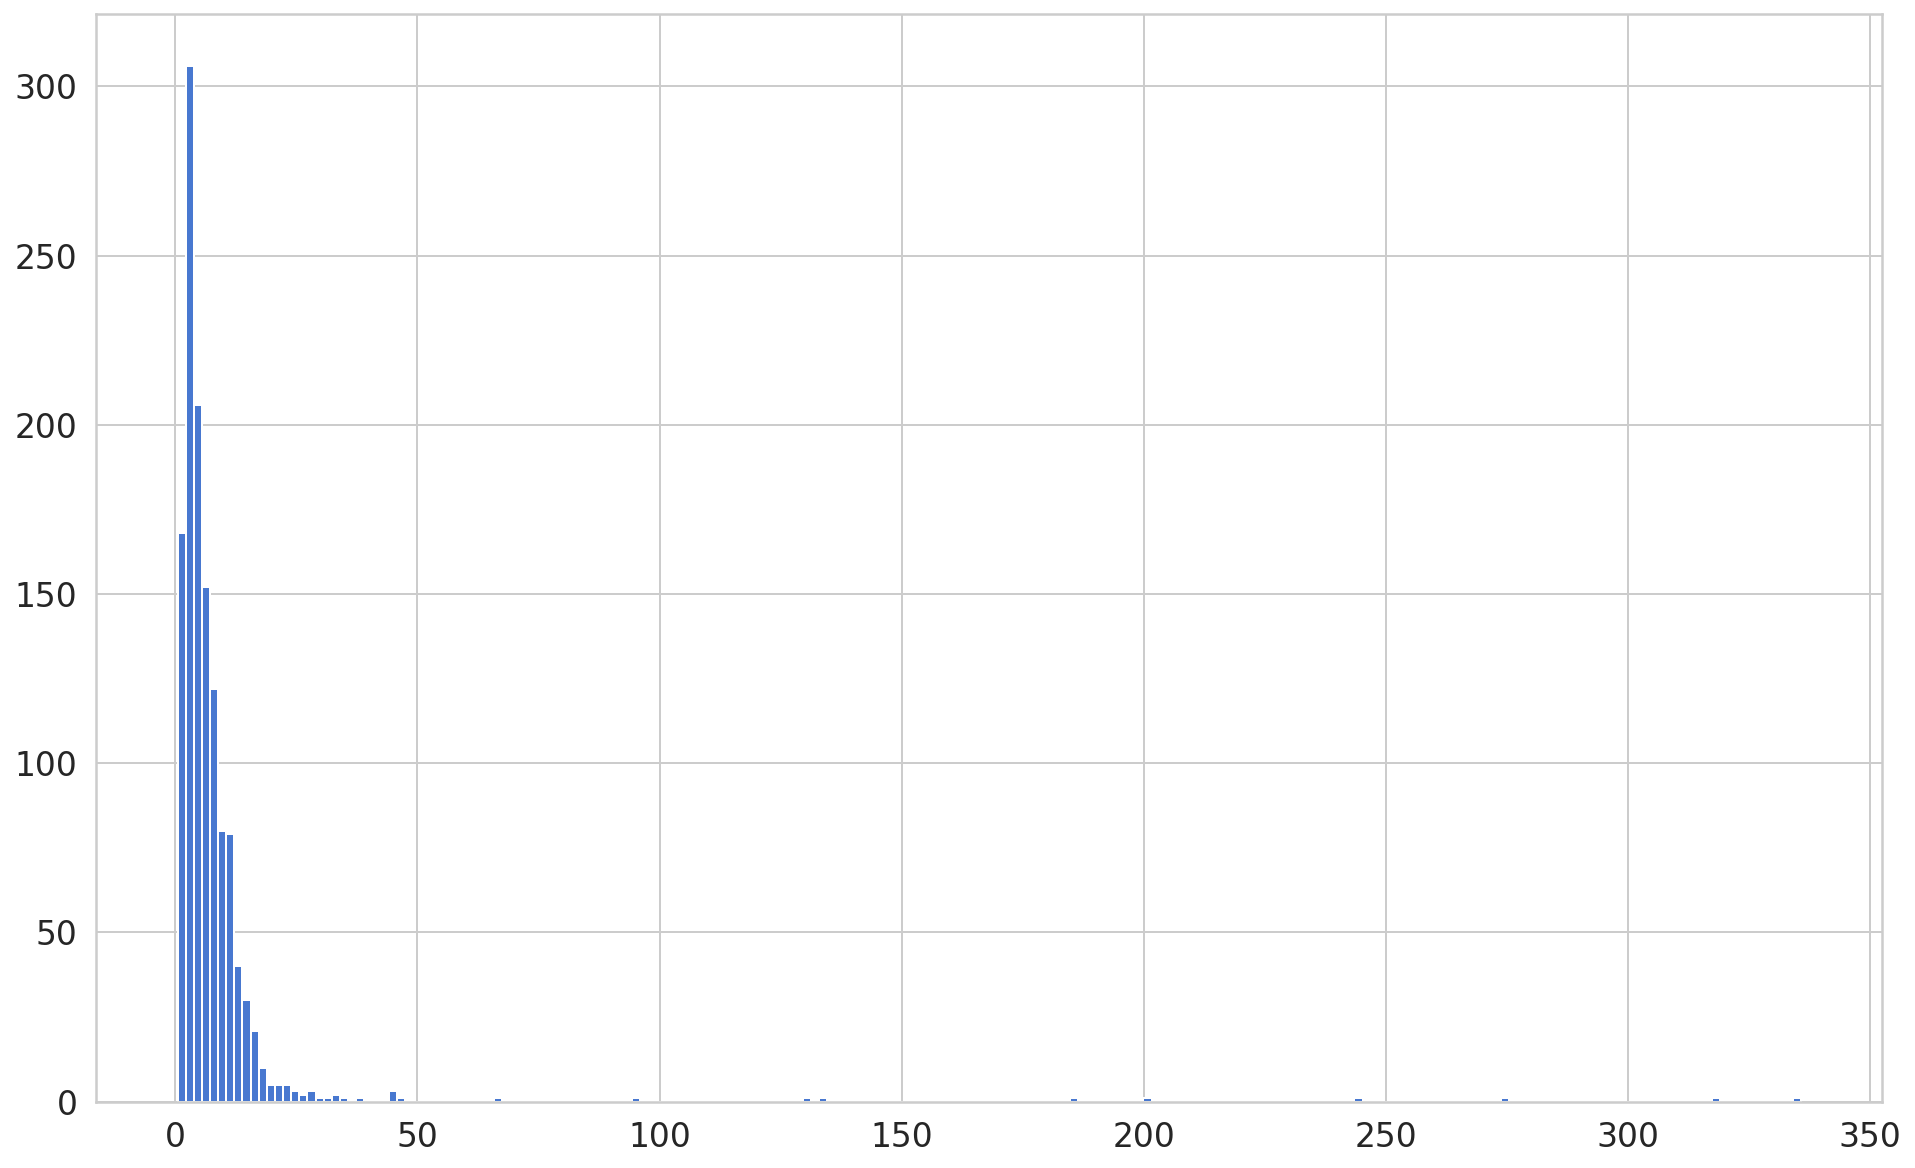

In [ ]:
plt.hist(test_score_dffreq1['loss'],bins=200)

# courbe roc et auc

In [ ]:
# choix de la valeur du seuil 
import more_itertools as mit


for x in mit.numeric_range(0, 350, 1):
    
    test_score_dffreq1 = pd.DataFrame(index=test1freqtotale[TIME_STEPS:].index)
    test_score_dffreq1['loss'] = test_mae_lossfreq1
    test_score_dffreq1['threshold'] = x
    test_score_dffreq1['anomaly'] = test_score_dffreq1.loss > test_score_dffreq1.threshold
    test_score_dffreq1['nbtweet'] = test1freqtotale[TIME_STEPS:].freq_totale
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(df['anomaly'][5:],test_score_dffreq1['anomaly'])
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]
    TN = confusion_matrix[0][0]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    tab_auc.loc[len(tab_auc.index)] = [x, TPR,FPR] 




In [ ]:
tab_auc

,threshold,tpr,fpr
0,0.0,1.000000,1.000000
1,1.0,1.000000,0.976608
2,2.0,1.000000,0.873016
3,3.0,0.983333,0.716792
4,4.0,0.966667,0.584795
...,...,...,...
345,345.0,0.000000,0.000000
346,346.0,0.000000,0.000000
347,347.0,0.000000,0.000000
348,348.0,0.000000,0.000000


No handles with labels found to put in legend.


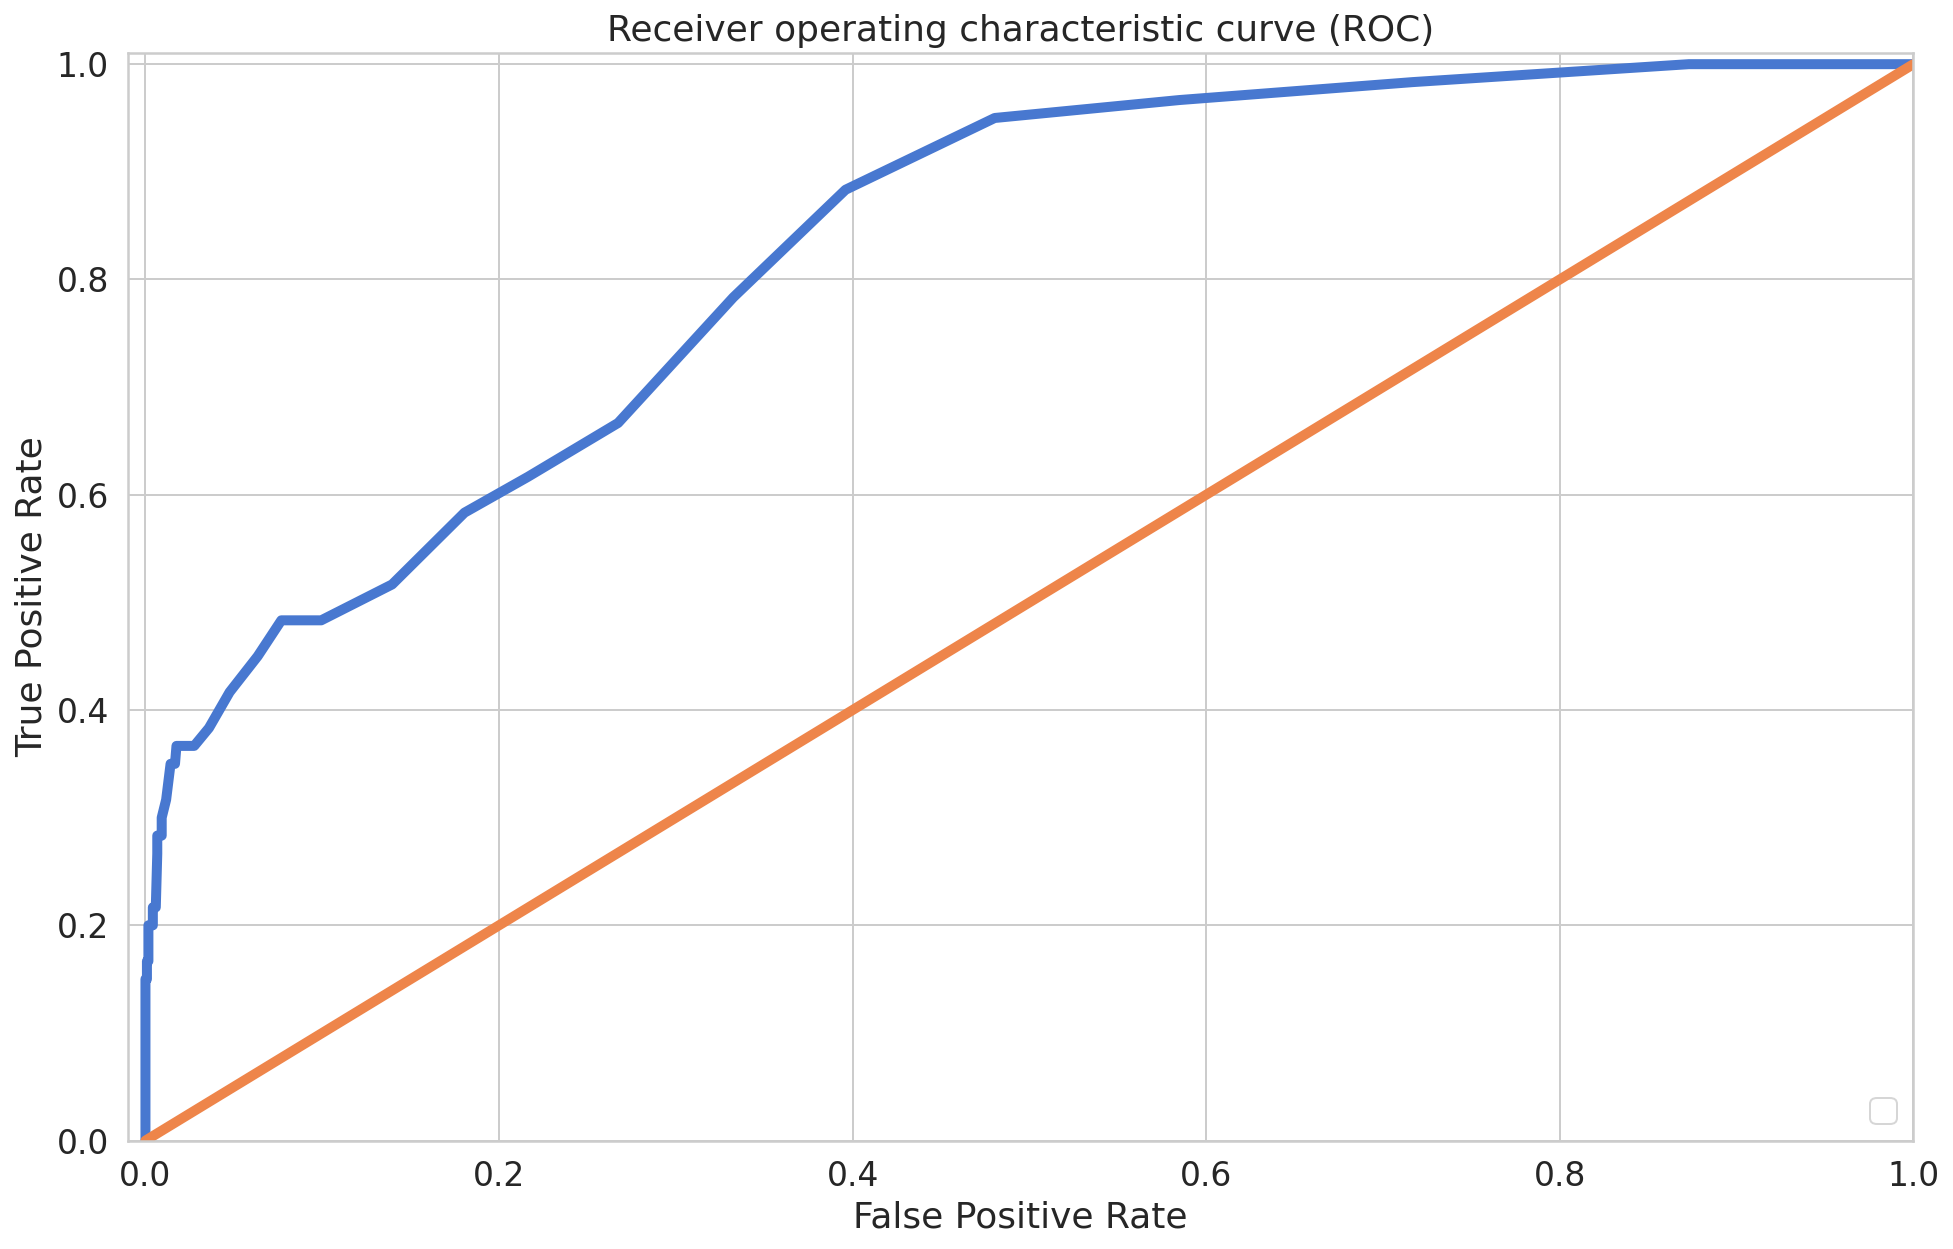

In [ ]:

plt.plot(tab_auc['fpr'], tab_auc['tpr'], linewidth=5)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# anomalies sur les fréquences réélles


In [ ]:
anomaliesfreq1 = test_score_dffreq1[test_score_dffreq1.anomaly == True]
anomaliesfreq1['nbtweet'] = scaler.inverse_transform(anomaliesfreq1['nbtweet'])
anomaliesfreq1.head(2)


,loss,threshold,anomaly,nbtweet
created_at,,,,


In [ ]:


import plotly.express as px

fig = px.line(test1freqtotale, x=test1freqtotale[TIME_STEPS:].index, y=scaler.inverse_transform(test1freqtotale[TIME_STEPS:].freq_totale) )
fig.add_scatter(x=anomaliesfreq1.index, y=anomaliesfreq1.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




# Training + prediction keyword innondation

In [ ]:
history = model.fit(
    X_train1innondation, y_train1innondation, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/20
68/68 [==============================] - 0s 5ms/step - loss: 0.0767 - val_loss: 0.0470
Epoch 2/20
68/68 [==============================] - 0s 5ms/step - loss: 0.0704 - val_loss: 0.0468
Epoch 3/20
68/68 [==============================] - 0s 5ms/step - loss: 0.0687 - val_loss: 0.0477
Epoch 4/20
68/68 [==============================] - 0s 5ms/step - loss: 0.0665 - val_loss: 0.0482
Epoch 5/20
68/68 [==============================] - 0s 5ms/step - loss: 0.0658 - val_loss: 0.0502
Epoch 6/20
68/68 [==============================] - 0s 5ms/step - loss: 0.0643 - val_loss: 0.0477
Epoch 7/20
68/68 [==============================] - 0s 5ms/step - loss: 0.0631 - val_loss: 0.0472
Epoch 8/20
68/68 [==============================] - 0s 5ms/step - loss: 0.0621 - val_loss: 0.0471
Epoch 9/20
68/68 [==============================] - 0s 5ms/step - loss: 0.0614 - val_loss: 0.0459
Epoch 10/20
68/68 [==============================] - 0s 5ms/step - loss: 0.0606 - val_loss: 0.0456
Epoch 11/20
68/68 [

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



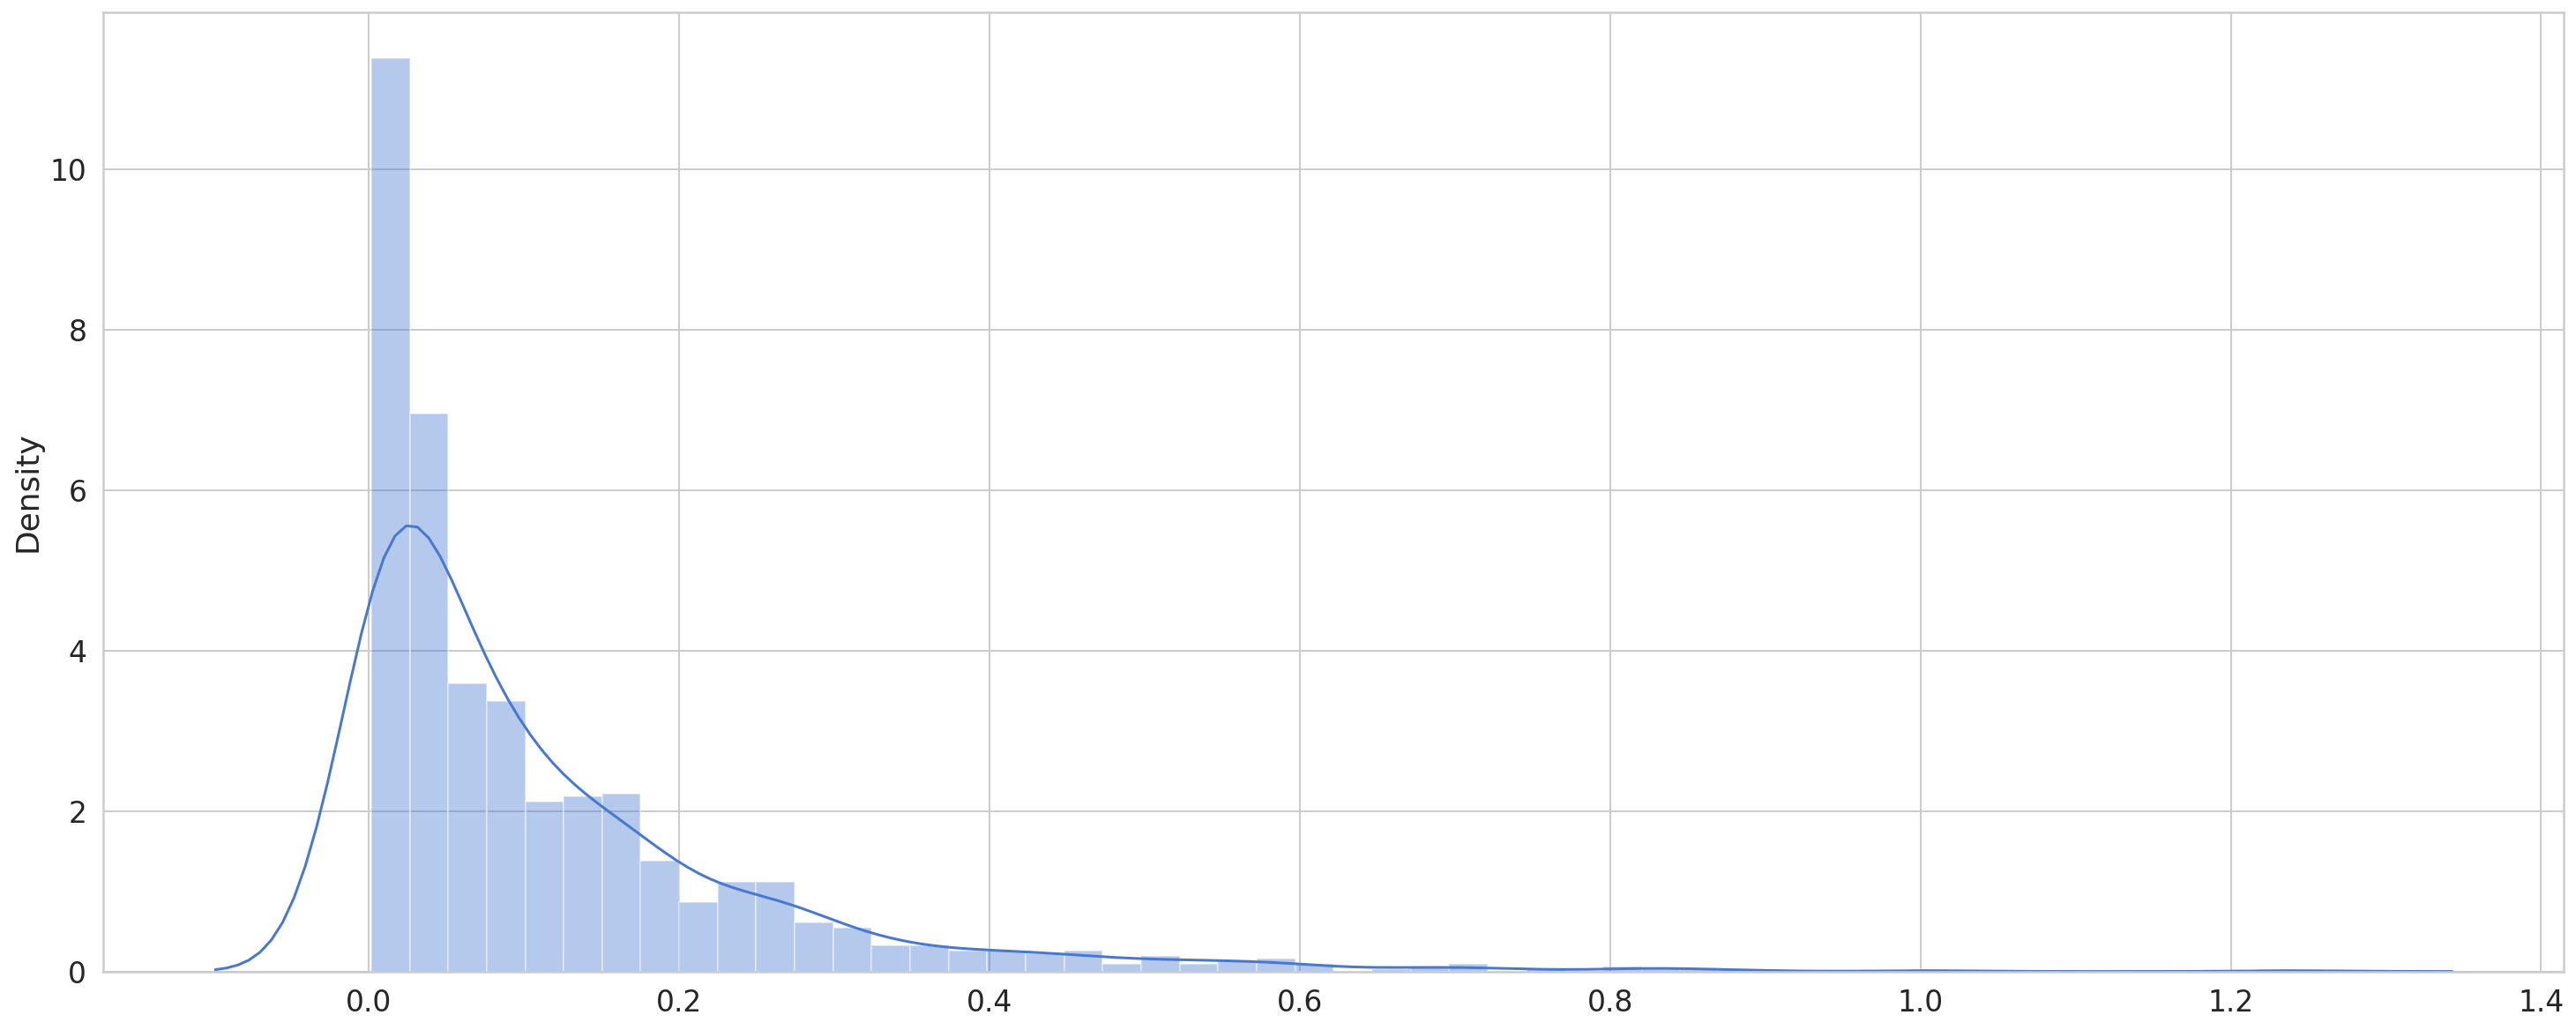

In [ ]:
X_test_predfreq1innondation = model.predict(X_test1innondation)


test_mae_lossfreq1innondation = np.mean(np.abs(X_test_predfreq1innondation - X_test1innondation), axis=1)


plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1innondation, bins=50, kde=True);

In [ ]:
predictfreq1innondation = X_test_predfreq1innondation[:,0]
test_predfreq1innondation = pd.DataFrame(index=test1innondation[TIME_STEPS:].index)
test_predfreq1innondation['pred'] = scaler.inverse_transform(predictfreq1innondation)
test_predfreq1innondation


,pred
created_at,
2021-06-14 13:00:00+00:00,1.138290
2021-06-14 13:10:00+00:00,1.117892
2021-06-14 13:20:00+00:00,1.126223
2021-06-14 13:30:00+00:00,1.128538
2021-06-14 13:40:00+00:00,1.128538
...,...
2021-06-23 11:30:00+00:00,9.035479
2021-06-23 11:40:00+00:00,2.277718
2021-06-23 11:50:00+00:00,3.551859


In [ ]:


import plotly.express as px


fig = px.line(test1innondation, x=test1innondation[TIME_STEPS:].index, y=scaler.inverse_transform(test1innondation[TIME_STEPS:].innondation),title="data vs pred")
#fig.add_scatter(x=test[TIME_STEPS:].index, y=scaler.inverse_transform(test[TIME_STEPS:].nbtweet), mode='lines',name="test",marker_color='rgba(0, 0, 0, .9)')

fig.add_scatter(x=test_predfreq1innondation.index, y=test_predfreq1innondation[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
threshold = []
tpr=[]
fpr=[]
tab_auc_innondation = pd.DataFrame({"threshold": threshold,
                                "tpr":tpr,
                                "fpr":fpr })
tab_auc_innondation

,threshold,tpr,fpr


In [ ]:
THRESHOLD = 0.12

test_score_dffreq1innondation = pd.DataFrame(index=test1innondation[TIME_STEPS:].index)
test_score_dffreq1innondation['loss'] = test_mae_lossfreq1innondation
test_score_dffreq1innondation['threshold'] = THRESHOLD
test_score_dffreq1innondation['anomaly'] = test_score_dffreq1innondation.loss > test_score_dffreq1innondation.threshold
test_score_dffreq1innondation['nbtweet'] = test1innondation[TIME_STEPS:].innondation
test_score_dffreq1innondation




,loss,threshold,anomaly,nbtweet
created_at,,,,
2021-06-14 13:00:00+00:00,0.056087,0.12,False,-0.507291
2021-06-14 13:10:00+00:00,0.042237,0.12,False,-0.507291
2021-06-14 13:20:00+00:00,0.029585,0.12,False,-0.507291
2021-06-14 13:30:00+00:00,0.006993,0.12,False,-0.507291
2021-06-14 13:40:00+00:00,0.006993,0.12,False,-0.507291
...,...,...,...,...
2021-06-23 11:30:00+00:00,0.321865,0.12,True,-0.442699
2021-06-23 11:40:00+00:00,0.132848,0.12,True,-0.313513
2021-06-23 11:50:00+00:00,0.161215,0.12,True,-0.507291


In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1innondation, x=test_score_dffreq1innondation.index, y="loss")
fig.add_scatter(x=test_score_dffreq1innondation.index, y=test_score_dffreq1innondation['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1innondation.index, y=test_score_dffreq1innondation['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1innondation = test_score_dffreq1innondation[test_score_dffreq1innondation.anomaly == True]
anomaliesfreq1innondation['nbtweet'] = scaler.inverse_transform(anomaliesfreq1innondation['nbtweet'])
anomaliesfreq1innondation.head(2)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,loss,threshold,anomaly,nbtweet
created_at,,,,
2021-06-15 16:40:00+00:00,0.141292,0.12,True,1.0
2021-06-16 10:10:00+00:00,0.141292,0.12,True,2.0


In [ ]:


import plotly.express as px

fig = px.line(test1innondation, x=test1innondation[TIME_STEPS:].index, y=scaler.inverse_transform(test1innondation[TIME_STEPS:].innondation) )
fig.add_scatter(x=anomaliesfreq1innondation.index, y=anomaliesfreq1innondation.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




# courbe roc et auc

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(df['anomaly'][5:],test_score_dffreq1innondation['anomaly'])
FP = confusion_matrix[0][1]#9 
FN = confusion_matrix[1][0]#39
TP = confusion_matrix[1][1]#21
TN = confusion_matrix[0][0]#1188

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
confusion_matrix

array([[816, 381],
       [ 25,  35]])

In [ ]:

tab_auc_innondation.loc[len(tab_auc.index)] = [THRESHOLD, TPR,FPR] 

tab_auc_innondation

,threshold,tpr,fpr
0,0.0,1.000000,1.000000
1,0.1,0.933333,0.533835
2,0.2,0.633333,0.223893
3,0.3,0.450000,0.069340
4,0.4,0.383333,0.022556
5,0.5,0.350000,0.007519
6,0.6,0.283333,0.005013
7,0.7,0.233333,0.003342
8,0.8,0.200000,0.003342
9,0.9,0.200000,0.002506


No handles with labels found to put in legend.


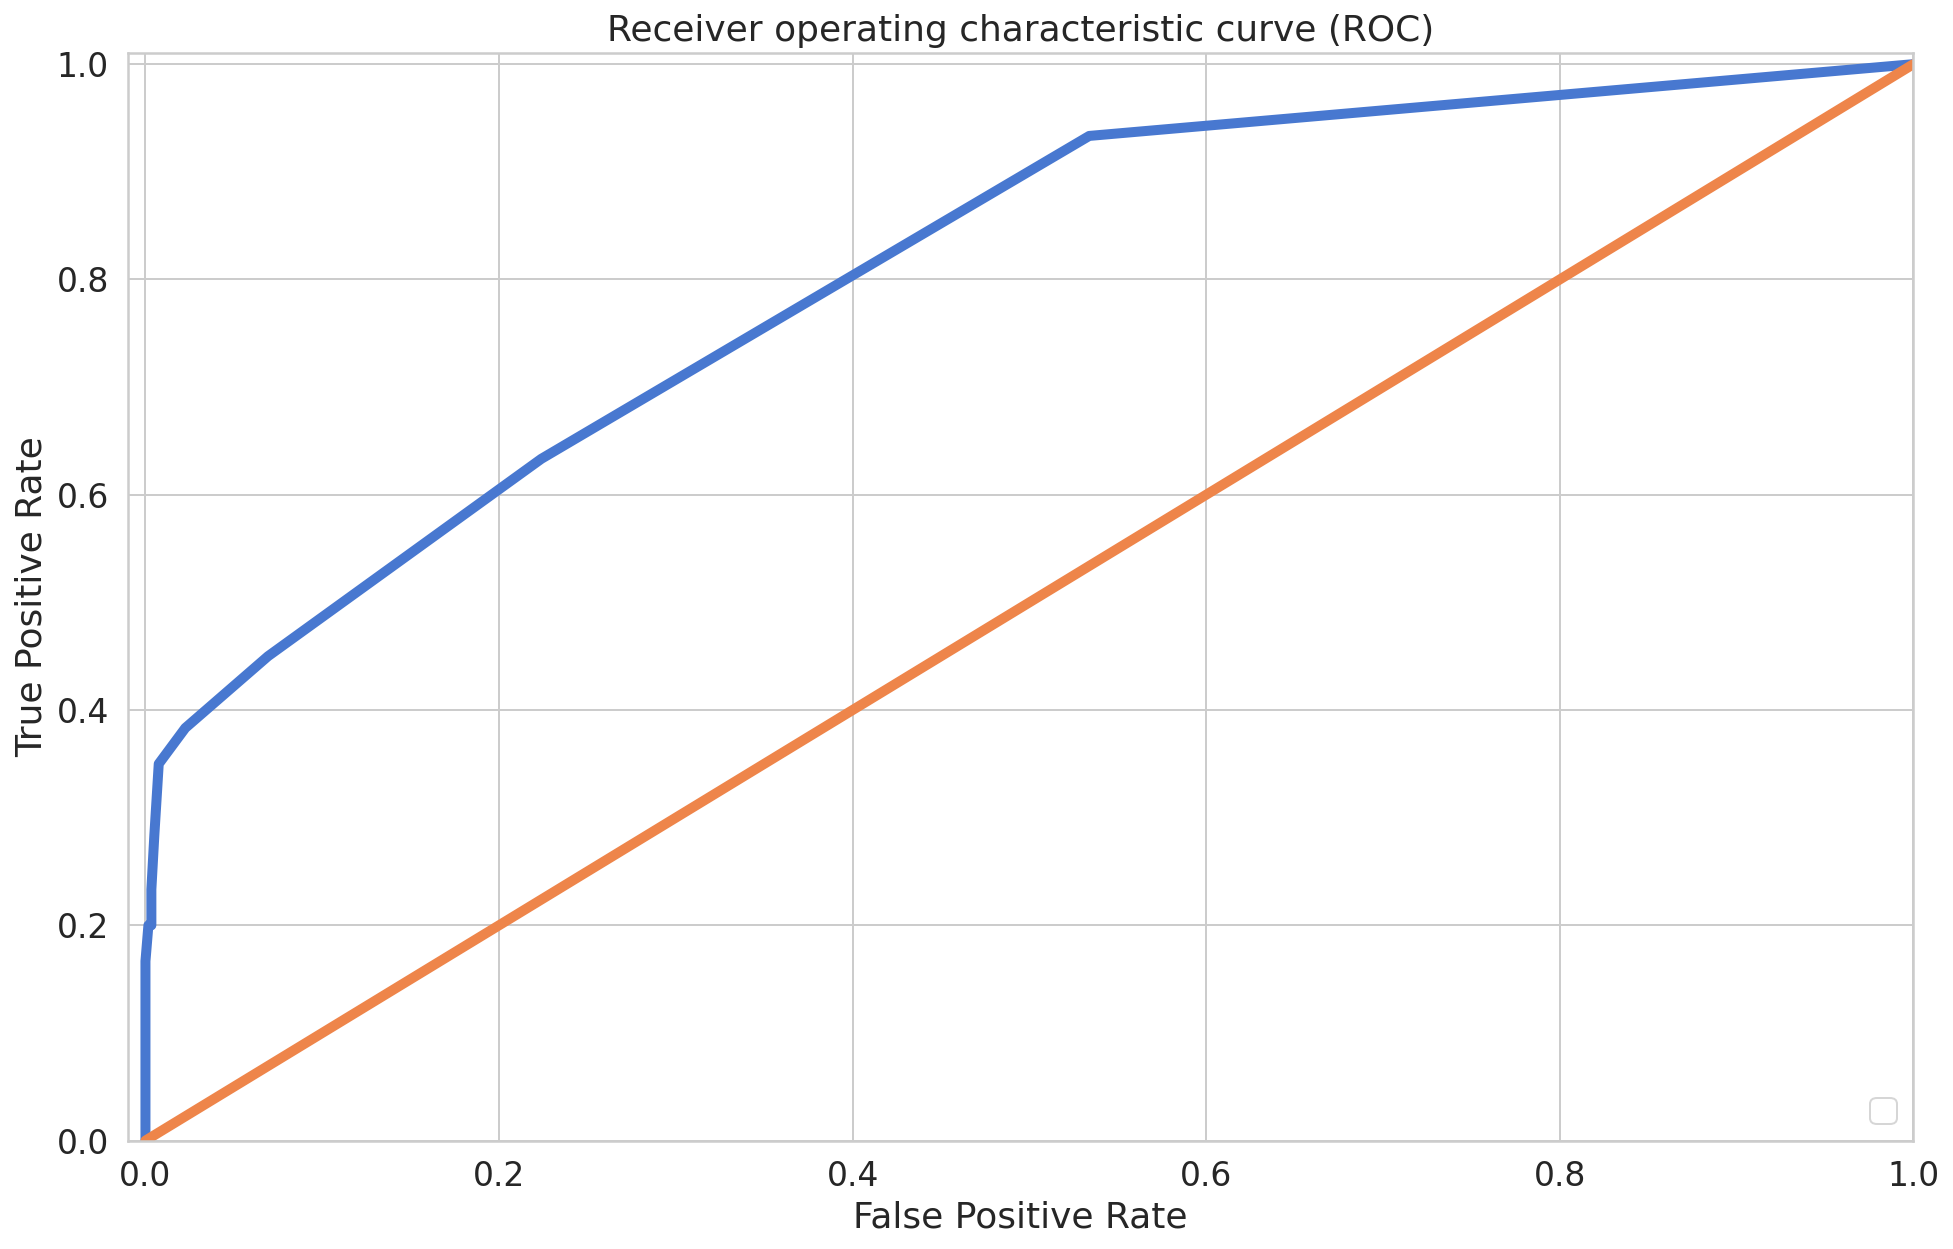

In [ ]:


roc_auc = auc(tab_auc_innondation['fpr'], tab_auc_innondation['tpr'])

plt.plot(tab_auc_innondation['fpr'], tab_auc_innondation['tpr'], linewidth=5)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Training + prediction keyword crue

In [ ]:
history = model.fit(
    X_train1crue, y_train1crue, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/20
87/87 [==============================] - 1s 8ms/step - loss: 0.0492 - val_loss: 0.0303
Epoch 2/20
87/87 [==============================] - 1s 8ms/step - loss: 0.0489 - val_loss: 0.0294
Epoch 3/20
87/87 [==============================] - 1s 7ms/step - loss: 0.0470 - val_loss: 0.0272
Epoch 4/20
87/87 [==============================] - 1s 7ms/step - loss: 0.0473 - val_loss: 0.0323
Epoch 5/20
87/87 [==============================] - 1s 7ms/step - loss: 0.0463 - val_loss: 0.0287
Epoch 6/20
87/87 [==============================] - 1s 7ms/step - loss: 0.0468 - val_loss: 0.0272
Epoch 7/20
87/87 [==============================] - 1s 7ms/step - loss: 0.0464 - val_loss: 0.0329
Epoch 8/20
87/87 [==============================] - 1s 7ms/step - loss: 0.0449 - val_loss: 0.0306
Epoch 9/20
87/87 [==============================] - 1s 7ms/step - loss: 0.0453 - val_loss: 0.0328
Epoch 10/20
87/87 [==============================] - 1s 7ms/step - loss: 0.0454 - val_loss: 0.0362
Epoch 11/20
87/87 [

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



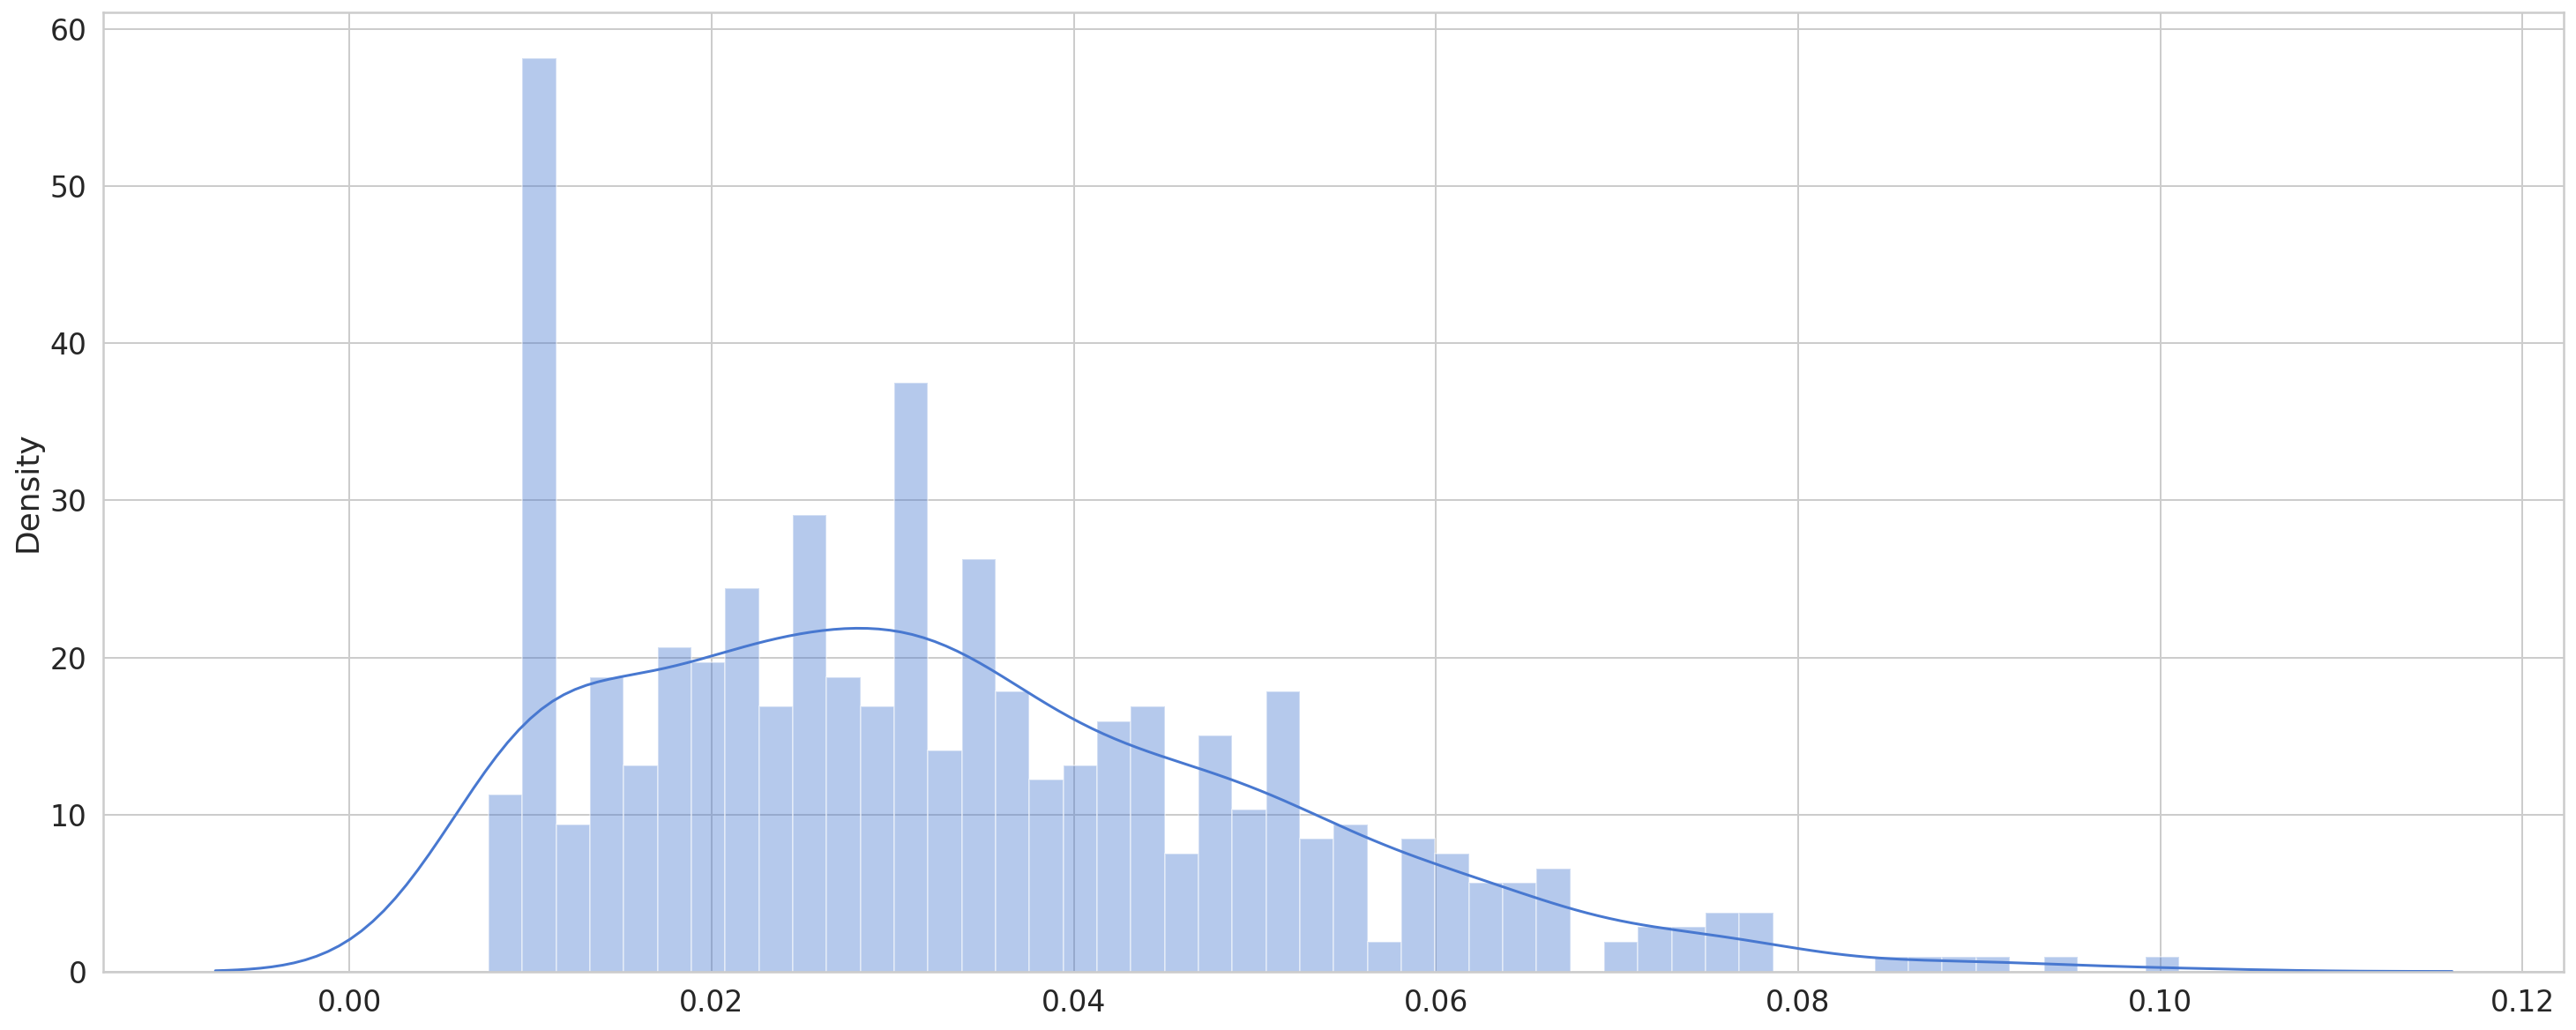

In [ ]:
X_test_predfreq1crue = model.predict(X_test1crue)


test_mae_lossfreq1crue = np.mean(np.abs(X_test_predfreq1crue - X_test1crue), axis=1)


plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1crue, bins=50, kde=True);

In [ ]:
predictfreq1crue = X_test_predfreq1crue[:,0]
test_predfreq1crue = pd.DataFrame(index=test1crue[TIME_STEPS:].index)
test_predfreq1crue['pred'] = scaler.inverse_transform(predictfreq1crue)
test_predfreq1crue


,pred
created_at,
2021-06-19 13:00:00+00:00,1.396039
2021-06-19 13:10:00+00:00,0.927756
2021-06-19 13:20:00+00:00,1.322850
2021-06-19 13:30:00+00:00,1.517180
2021-06-19 13:40:00+00:00,1.333035
...,...
2021-06-23 11:30:00+00:00,1.577391
2021-06-23 11:40:00+00:00,1.504054
2021-06-23 11:50:00+00:00,1.686859


In [ ]:


import plotly.express as px


fig = px.line(test1crue, x=test1crue[TIME_STEPS:].index, y=scaler.inverse_transform(test1crue[TIME_STEPS:].crue),title="data vs pred")
#fig.add_scatter(x=test[TIME_STEPS:].index, y=scaler.inverse_transform(test[TIME_STEPS:].nbtweet), mode='lines',name="test",marker_color='rgba(0, 0, 0, .9)')
#fig.add_scatter(x=test2freqtotale[TIME_STEPS:].index, y=scaler.inverse_transform(test2freqtotale[TIME_STEPS:].freqtotale), mode='lines',name="pred",marker_color='rgba(255, 0, 0, .9)')
fig.add_scatter(x=test_predfreq1crue.index, y=test_predfreq1crue[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')
#fig.add_scatter(x=test_predfreq2.index, y=test_predfreq2[TIME_STEPS:].pred, mode='lines',name="pred2",marker_color='rgba(255, 15, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
THRESHOLD = 0.04

test_score_dffreq1crue = pd.DataFrame(index=test1crue[TIME_STEPS:].index)
test_score_dffreq1crue['loss'] = test_mae_lossfreq1crue
test_score_dffreq1crue['threshold'] = THRESHOLD
test_score_dffreq1crue['anomaly'] = test_score_dffreq1crue.loss > test_score_dffreq1crue.threshold
test_score_dffreq1crue['nbtweet'] = test1crue[TIME_STEPS:].crue
test_score_dffreq1crue




,loss,threshold,anomaly,nbtweet
created_at,,,,
2021-06-19 13:00:00+00:00,0.027859,0.04,False,-0.371522
2021-06-19 13:10:00+00:00,0.024897,0.04,False,-0.309869
2021-06-19 13:20:00+00:00,0.027134,0.04,False,-0.309869
2021-06-19 13:30:00+00:00,0.031866,0.04,False,-0.340695
2021-06-19 13:40:00+00:00,0.034933,0.04,False,-0.309869
...,...,...,...,...
2021-06-23 11:30:00+00:00,0.076620,0.04,True,-0.340695
2021-06-23 11:40:00+00:00,0.064575,0.04,True,-0.279043
2021-06-23 11:50:00+00:00,0.037127,0.04,False,-0.279043


In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1crue, x=test_score_dffreq1crue.index, y="loss")
fig.add_scatter(x=test_score_dffreq1crue.index, y=test_score_dffreq1crue['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1crue.index, y=test_score_dffreq1crue['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1crue = test_score_dffreq1crue[test_score_dffreq1crue.anomaly == True]
anomaliesfreq1crue['nbtweet'] = scaler.inverse_transform(anomaliesfreq1crue['nbtweet'])
anomaliesfreq1crue.head(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,loss,threshold,anomaly,nbtweet
created_at,,,,
2021-06-19 15:50:00+00:00,0.040851,0.04,True,3.0
2021-06-19 16:00:00+00:00,0.043066,0.04,True,6.0


In [ ]:


import plotly.express as px

fig = px.line(test1crue, x=test1crue[TIME_STEPS:].index, y=scaler.inverse_transform(test1crue[TIME_STEPS:].crue) )
fig.add_scatter(x=anomaliesfreq1crue.index, y=anomaliesfreq1crue.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




In [ ]:
THRESHOLD = 0.04

lstmjuincrue = pd.DataFrame(index=test1crue[TIME_STEPS:].index)
lstmjuincrue['freq'] = scaler.inverse_transform(test1crue[TIME_STEPS:].crue)
lstmjuincrue['pred'] = scaler.inverse_transform(predictfreq1crue)

lstmjuincrue['loss'] = test_mae_lossfreq1crue
lstmjuincrue['threshold'] = THRESHOLD
lstmjuincrue['anomaly'] = lstmjuincrue.loss > lstmjuincrue.threshold

data1crue['crue'] = scaler.inverse_transform(data1crue.crue)
lstmjuinfreqcrue = pd.concat([data1crue,lstmjuincrue],axis=0)
lstmjuinfreqcrue = lstmjuinfreqcrue.fillna(0)
lstmjuinfreqcrue['freq']= lstmjuinfreqcrue['crue']+lstmjuinfreqcrue['freq']
del(lstmjuinfreqcrue['crue'])
lstmjuinfreqcrue.to_csv("lstmjuinfreqcrue.csv",sep=";")
from google.colab import files
files.download('lstmjuinfreqcrue.csv')

lstmjuinfreqcrue


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Training + prediction keyword orage

In [ ]:
history = model.fit(
    X_train1orage, y_train1orage, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.1, 
    shuffle=True
)

Epoch 1/20
87/87 [==============================] - 1s 8ms/step - loss: 0.1640 - val_loss: 0.1719
Epoch 2/20
87/87 [==============================] - 1s 7ms/step - loss: 0.1458 - val_loss: 0.1717
Epoch 3/20
87/87 [==============================] - 1s 7ms/step - loss: 0.1394 - val_loss: 0.1685
Epoch 4/20
87/87 [==============================] - 1s 7ms/step - loss: 0.1361 - val_loss: 0.1687
Epoch 5/20
87/87 [==============================] - 1s 7ms/step - loss: 0.1376 - val_loss: 0.1707
Epoch 6/20
87/87 [==============================] - 1s 7ms/step - loss: 0.1321 - val_loss: 0.1729
Epoch 7/20
87/87 [==============================] - 1s 7ms/step - loss: 0.1284 - val_loss: 0.1742
Epoch 8/20
87/87 [==============================] - 1s 7ms/step - loss: 0.1289 - val_loss: 0.1770
Epoch 9/20
87/87 [==============================] - 1s 7ms/step - loss: 0.1264 - val_loss: 0.1707
Epoch 10/20
87/87 [==============================] - 1s 7ms/step - loss: 0.1256 - val_loss: 0.1686
Epoch 11/20
87/87 [

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



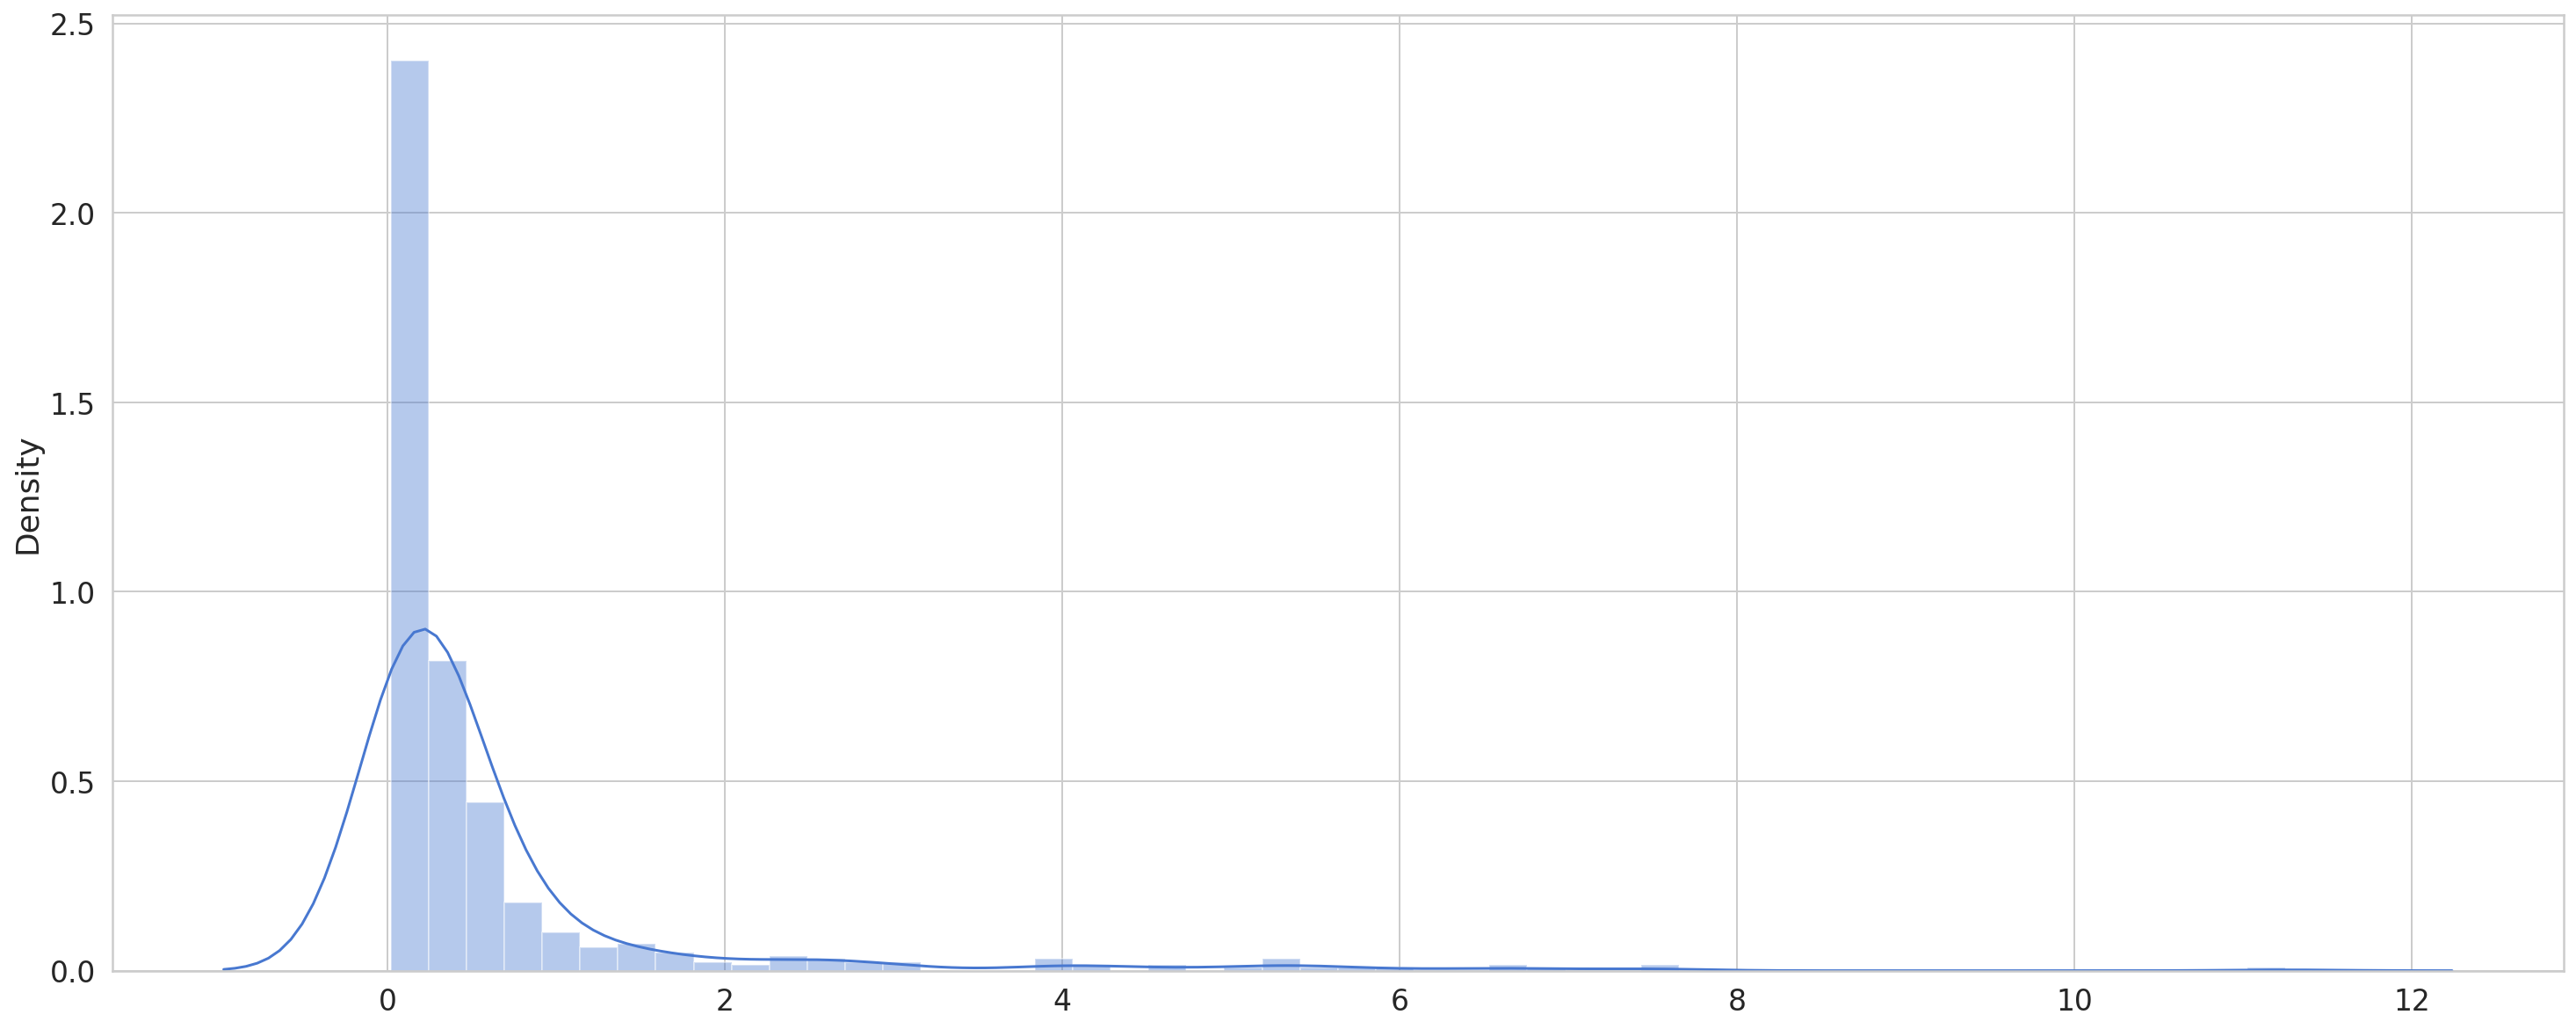

In [ ]:
X_test_predfreq1orage = model.predict(X_test1orage)

test_mae_lossfreq1orage = np.mean(np.abs(X_test_predfreq1orage - X_test1orage), axis=1)

plt.figure(figsize=(25,10))
sns.distplot(test_mae_lossfreq1orage, bins=50, kde=True);

In [ ]:
predictfreq1orage = X_test_predfreq1orage[:,0]
test_predfreq1orage = pd.DataFrame(index=test1orage[TIME_STEPS:].index)
test_predfreq1orage['pred'] = scaler.inverse_transform(predictfreq1orage)
test_predfreq1orage


,pred
created_at,
2021-06-19 13:00:00+00:00,15.853269
2021-06-19 13:10:00+00:00,17.711754
2021-06-19 13:20:00+00:00,15.595871
2021-06-19 13:30:00+00:00,12.081986
2021-06-19 13:40:00+00:00,12.165144
...,...
2021-06-23 11:30:00+00:00,10.069988
2021-06-23 11:40:00+00:00,10.168848
2021-06-23 11:50:00+00:00,9.781918


In [ ]:


import plotly.express as px


fig = px.line(test1orage, x=test1orage[TIME_STEPS:].index, y=scaler.inverse_transform(test1orage[TIME_STEPS:].orage),title="data vs pred")

fig.add_scatter(x=test_predfreq1orage.index, y=test_predfreq1orage[TIME_STEPS:].pred, mode='lines',name="pred1",marker_color='rgba(255, 0, 0, .9)')

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [ ]:
THRESHOLD = 3

test_score_dffreq1orage = pd.DataFrame(index=test1orage[TIME_STEPS:].index)
test_score_dffreq1orage['loss'] = test_mae_lossfreq1orage
test_score_dffreq1orage['threshold'] = THRESHOLD
test_score_dffreq1orage['anomaly'] = test_score_dffreq1orage.loss > test_score_dffreq1orage.threshold
test_score_dffreq1orage['nbtweet'] = test1orage[TIME_STEPS:].orage
test_score_dffreq1orage



,loss,threshold,anomaly,nbtweet
created_at,,,,
2021-06-19 13:00:00+00:00,0.191608,3,False,0.245006
2021-06-19 13:10:00+00:00,0.119334,3,False,0.121700
2021-06-19 13:20:00+00:00,0.081317,3,False,-0.094084
2021-06-19 13:30:00+00:00,0.153106,3,False,-0.001605
2021-06-19 13:40:00+00:00,0.110299,3,False,0.183353
...,...,...,...,...
2021-06-23 11:30:00+00:00,0.110756,3,False,-0.063258
2021-06-23 11:40:00+00:00,0.103344,3,False,-0.032432
2021-06-23 11:50:00+00:00,0.048356,3,False,0.060048


In [ ]:


import plotly.express as px


fig = px.bar(test_score_dffreq1orage, x=test_score_dffreq1orage.index, y="loss")
fig.add_scatter(x=test_score_dffreq1orage.index, y=test_score_dffreq1orage['loss'], mode='lines',name="loss",marker_color='rgba(0, 0, 0, .9)')
fig.add_scatter(x=test_score_dffreq1orage.index, y=test_score_dffreq1orage['threshold'], mode='lines',name="threshold",marker_color='rgba(255, 0, 0, .9)')
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()



In [ ]:
anomaliesfreq1orage = test_score_dffreq1orage[test_score_dffreq1orage.anomaly == True]
anomaliesfreq1orage['nbtweet'] = scaler.inverse_transform(anomaliesfreq1orage['nbtweet'])
anomaliesfreq1orage.head(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,loss,threshold,anomaly,nbtweet
created_at,,,,
2021-06-19 18:00:00+00:00,11.248986,3,True,304.0
2021-06-19 18:10:00+00:00,3.943195,3,True,498.0


In [ ]:


import plotly.express as px

fig = px.line(test1orage, x=test1orage[TIME_STEPS:].index, y=scaler.inverse_transform(test1orage[TIME_STEPS:].orage) )
fig.add_scatter(x=anomaliesfreq1orage.index, y=anomaliesfreq1orage.nbtweet, mode='markers',name="anomalies")
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()




In [ ]:
#plot frequence globale avec anomalies détectées (15 mai)

import plotly.express as px

fig = px.line(test1freqtotale, x=test1freqtotale[TIME_STEPS:].index, y=scaler.inverse_transform(test1freqtotale[TIME_STEPS:].freqtotale) )
fig.add_scatter(x=test1freqtotale[TIME_STEPS:].index, y=scaler.inverse_transform(test1freqtotale[TIME_STEPS:].freqtotale), mode='lines',name="frequence totale")

fig.add_scatter(x=anomaliesfreq1.index, y=anomaliesfreq1.nbtweet, mode='markers',name="anomalies")

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)
fig.write_html('lstmjuinfreqtot.html')
fig.show()




In [ ]:
#plot frequences séparées avec anomalies détectées 

import plotly.express as px

fig=px.line(test1innondation,x=test1innondation[TIME_STEPS:].index, y=scaler.inverse_transform(test1innondation[TIME_STEPS:].innondation))


fig.add_scatter(x=anomaliesfreq1innondation.index, y=anomaliesfreq1innondation.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test1innondation[TIME_STEPS:].index, y=scaler.inverse_transform(test1innondation[TIME_STEPS:].innondation), mode='lines',name="innondation")

fig.add_scatter(x=anomaliesfreq1crue.index, y=anomaliesfreq1crue.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test1crue[TIME_STEPS:].index, y=scaler.inverse_transform(test1crue[TIME_STEPS:].crue), mode='lines',name="crue")

fig.add_scatter(x=anomaliesfreq1orage.index, y=anomaliesfreq1orage.nbtweet, mode='markers',name="anomalies")
fig.add_scatter(x=test1orage[TIME_STEPS:].index, y=scaler.inverse_transform(test1orage[TIME_STEPS:].orage), mode='lines',name="orage")

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
         
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)



fig.write_html('lstmjuinall.html')
fig.show()




In [ ]:
from google.colab import files
files.download('lstmjuinfreqtot.html')
files.download('lstmjuinall.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>